# Exploring Mol2vec vectors
[Mol2vec](http://pubs.acs.org/doi/10.1021/acs.jcim.7b00616) is an unsupervised machine learning approach to obtain hight dimensional embeddings of chemical substructures. It is based on [word2vec](https://arxiv.org/abs/1301.3781) algorithm and if word2vec learns such embeddings that vectors representing similar words group together, so should Mol2vec learn substructure embeddings where vectors of chemically related substructures end up close in vector space.
<br><br>
This notebook provides an interactive plot depicting 300 most common substructures and gives insight into the relationships Mol2vec learns.
<br><br>
If you are new to Jupyter notebook simply click on *"Cell"* -> *"Run All"* and scrool down to see the plot.

In [1]:
import pickle
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from IPython.display import SVG

In order to keep this notebook slim some steps were pre-calculated.  

Load pre-calculated SVG depictions of 300 most common substructures (represented by Morgan identifiers). Substructures are depicted on random molecules where substructure is highlighted.

In [2]:
with open('depictions.pkl', 'rb') as f:
    identifier_depictions = pickle.load(f)

Loading a Mol2vec model trained on 20M compounds downloaded from ZINC database using:
- radius 1
- UNK to replace all identifiers that appear less than 4 times
- skip-gram and window size of 10
- resulting in 300 dimensional embeddings

Depiction and model training were done using our [Mol2vec](https://github.com/samoturk/mol2vec) implementation. Depiction function is using [RDKit](https://github.com/rdkit/rdkit) and model training is relying on word2vec implementation from [gensim](https://radimrehurek.com/gensim/models/word2vec.html).

In [3]:
model = Word2Vec.load('model_300dim.pkl')

Example vector representing identifier `'3315826729'`

In [4]:
model.wv['3315826729']

array([ 0.05920351,  0.04540923, -0.0984517 ,  0.08198658,  0.01767361,
       -0.44732982, -0.6322294 ,  0.2725765 , -0.5938064 , -0.29551634,
       -0.04468651,  0.01800465, -0.03330593,  0.01149984, -0.02082377,
       -0.1644032 , -0.12564853, -0.30088434,  0.17487787, -0.2513254 ,
        0.01743176,  0.5653546 , -0.08646958,  0.33263516, -0.07011971,
       -0.5787332 , -0.44554466, -0.05275482, -0.16231972, -0.2805905 ,
        0.31790248,  0.29869255,  0.36739072, -0.21576877, -0.17456014,
       -0.64243513,  0.24821068,  0.18224494, -0.4516568 ,  0.03386842,
       -0.21662444, -0.24381138,  0.38993394,  0.6072493 , -0.26597854,
       -0.11135259, -0.6984357 ,  0.23751897,  0.37667257, -0.1565622 ,
        0.48533273,  0.4077411 ,  0.31866214,  0.1043139 ,  0.07350294,
       -0.19894293,  0.24359755,  0.10176945, -0.0445652 , -0.25336495,
       -0.4778037 , -0.32255203, -0.0556614 , -0.23559287, -0.1424404 ,
        0.06446814,  0.0324663 ,  0.37640765,  0.13690323, -0.10

Depiction of substructure `'3315826729'` on a random molecule. `'3315826729'` represents an amide carbon, which is highlighted dark green and surrounding atoms within radius 1 are highlighted lime.

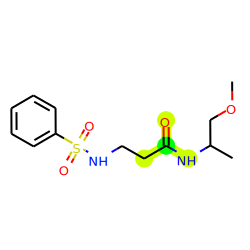

In [5]:
SVG(identifier_depictions['3315826729'][2])

In [6]:
identifiers = list(identifier_depictions)

Vectors of 300 substructures have to be projected in 2D using t-SNE.

In [7]:
X = [model.wv[x] for x in identifier_depictions]

In [8]:
tsne_model = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=1000, metric='cosine')
tsne_pca = tsne_model.fit_transform(X)

[Bokeh](https://bokeh.pydata.org/en/latest/) is used for plotting

In [9]:
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

Data source and hover tool tips (SVGs)

In [10]:
source = ColumnDataSource(data=dict(x=tsne_pca[:,0], y=tsne_pca[:,1], desc=identifiers,
                                   svgs=[identifier_depictions[x][1] for x in identifiers]))

hover = HoverTool(tooltips="""
    <div>
        <div>@svgs{safe}
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
        </div>
    </div>
    """
)
p = figure(plot_width=700, plot_height=700, tools=['reset,box_zoom,wheel_zoom,zoom_in,zoom_out,pan',hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=10, source=source, fill_alpha=0.2,);

#### The plot of projections Mol2vec vectors
- provides hover tool tips that depict substructures represented by each point
- different zooming options
- reset

In [11]:
show(p)

Created by Samo Turk, Nov. 2017